# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

Import libraries & CSV file

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from scipy import stats
# For min_max scaling
from sklearn.preprocessing import MinMaxScaler

# For z-score scaling
from sklearn.preprocessing import StandardScaler

# For Box-Cox Normalization
from scipy import stats

# For Label Encoding
from sklearn import preprocessing

# 'C://Users/BETER/Desktop/9th Material/Data Engineering/mile1/2019_Accidents_UK.csv'
file = 'E://University/Semester 9/Data Engineering (NETW 908)/Project/2019_Accidents_UK.csv'
df = pd.read_csv(file, index_col='accident_index', low_memory=0)

Displaying head of the dataframe

In [230]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,3,...,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01004762
2019010152270,2019,010152270,530219.0,172463.0,-0.127949,51.436208,Metropolitan Police,Slight,2,1,...,unknown (self reported),Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01003117
2019010155191,2019,010155191,530222.0,182543.0,-0.124193,51.526795,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000943
2019010155192,2019,010155192,525531.0,184605.0,-0.191044,51.546387,Metropolitan Police,Serious,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000973
2019010155194,2019,010155194,524920.0,184004.0,-0.200064,51.541121,Metropolitan Police,Slight,2,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000546


In [231]:
df.var()

accident_year             0.000000e+00
location_easting_osgr     9.031276e+09
location_northing_osgr    2.278155e+10
longitude                 1.938654e+00
latitude                  1.848300e+00
number_of_vehicles        5.018479e-01
number_of_casualties      5.690724e-01
dtype: float64

In [232]:
df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties
count,117536.0,117508.000000,1.175080e+05,117508.000000,117508.000000,117536.000000,117536.000000
mean,2019.0,452403.224717,2.786857e+05,-1.249439,52.395427,1.840976,1.303073
std,0.0,95033.024831,1.509356e+05,1.392356,1.359522,0.708412,0.754369
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000
25%,2019.0,388018.250000,1.755260e+05,-2.180604,51.465934,1.000000,1.000000
50%,2019.0,459396.000000,2.184650e+05,-1.123331,51.852523,2.000000,1.000000
75%,2019.0,529373.250000,3.848040e+05,-0.135499,53.357497,2.000000,1.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,17.000000,52.000000


# 2- EDA

Is there a relation between number of vehicles and number of casualties?    
number_of_vehicles VS. number_of_casualties

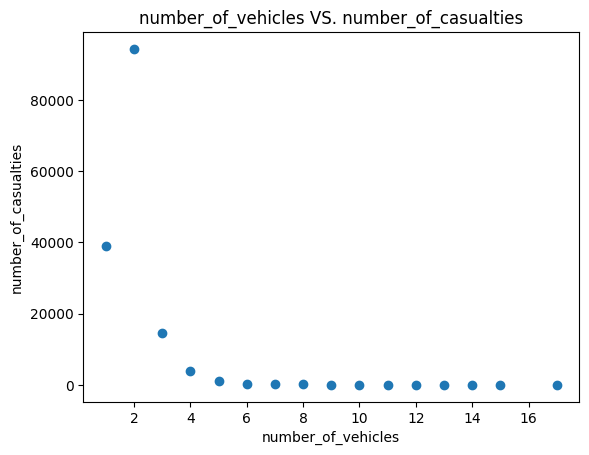

In [233]:
df_new = df.copy()
age_counts = df_new.groupby(['number_of_vehicles'])['number_of_casualties'].sum() #returns a series of each age and the corresponding number of individuals who survived
plt.xlabel('number_of_vehicles')
plt.ylabel('number_of_casualties')
plt.title('number_of_vehicles VS. number_of_casualties')
plt.scatter(age_counts.index,age_counts)
plt.show()

What are number of occurence for each number of casualities?     
Number of casualties vs Count of casualties

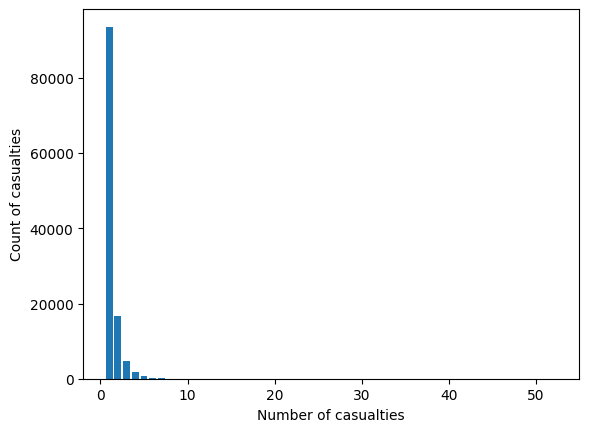

In [234]:
# df_sorted_date = df.copy()
# df_sorted_date = df_sorted_date.sort_values(by=['date'], ascending=True)

class_series = df['number_of_casualties'].value_counts()
class_series
bar_plot = plt.bar(class_series.index, class_series)
plt.locator_params(integer=True)
plt.xlabel('Number of casualties')
plt.ylabel('Count of casualties')
plt.show()

How many accidents occur each day?     
Number of accidents that occured in each day

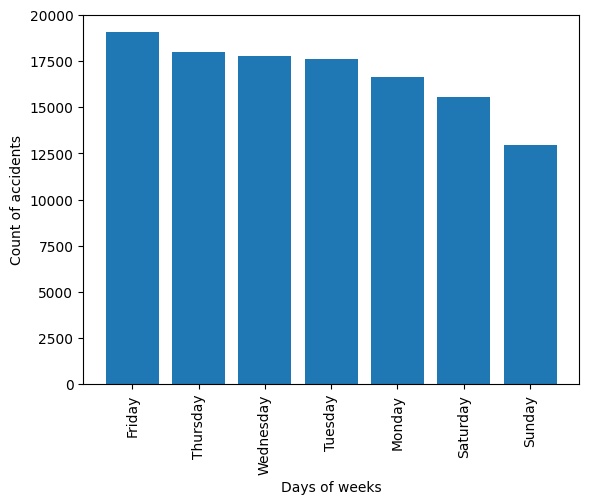

In [235]:
df_weekdays = df.copy()
weekday_series = df_weekdays.day_of_week.value_counts()
weekday_series

bar_plot = plt.bar(weekday_series.index, weekday_series)
plt.locator_params(integer=True)
plt.xlabel('Days of weeks')
plt.xticks(rotation = 90)
plt.ylabel('Count of accidents')
plt.show()

Distribution of Vehicle numbers

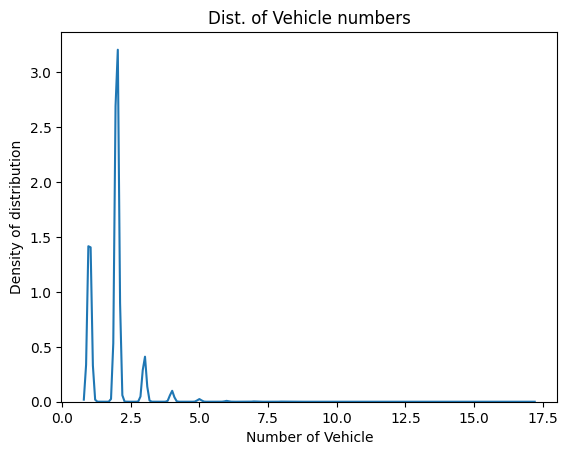

In [236]:
sns.kdeplot(df.number_of_vehicles)
plt.title('Dist. of Vehicle numbers')
plt.xlabel('Number of Vehicle')
plt.ylabel('Density of distribution')
plt.show()

Dist. of Casualities numbers

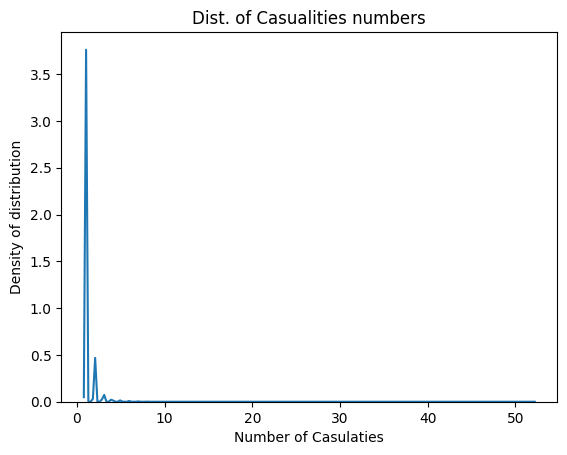

In [237]:
sns.kdeplot(df.number_of_casualties)
plt.title('Dist. of Casualities numbers')
plt.xlabel('Number of Casulaties')
plt.ylabel('Density of distribution')
plt.show()

Dist. of Casualities numbers & vehicles number aren't normally distributed

Distribution of week day is normally distributed

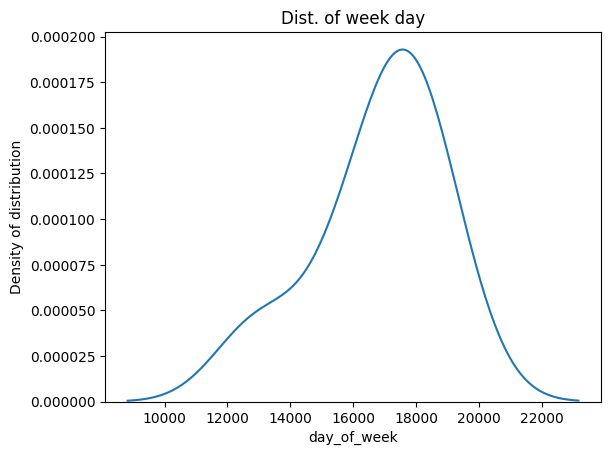

In [238]:
sns.kdeplot(df['day_of_week'].value_counts())
plt.title('Dist. of week day')
plt.ylabel('Density of distribution')
plt.show()

What are the top 5 local authority districts where accidents occured? 

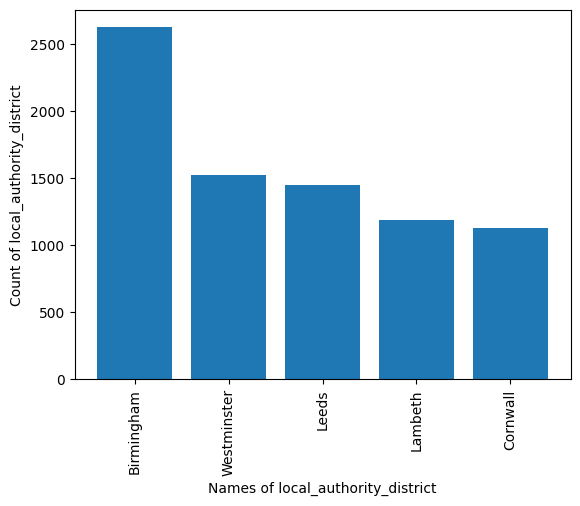

In [239]:
class_series = df['local_authority_district'].value_counts().head()
class_series
bar_plot = plt.bar(class_series.index, class_series)
plt.locator_params(integer=True)
plt.xlabel('Names of local_authority_district')
plt.xticks(rotation = 90)
plt.ylabel('Count of local_authority_district')
plt.show()

What are the top 5 dates when accidents occured?     
04/12/2019 was Friday. Brexit election.         
29/11/2019 was Friday. London Bridge Stabbing.          
20/09/2019 was Friday. Massive Climate Strike.         

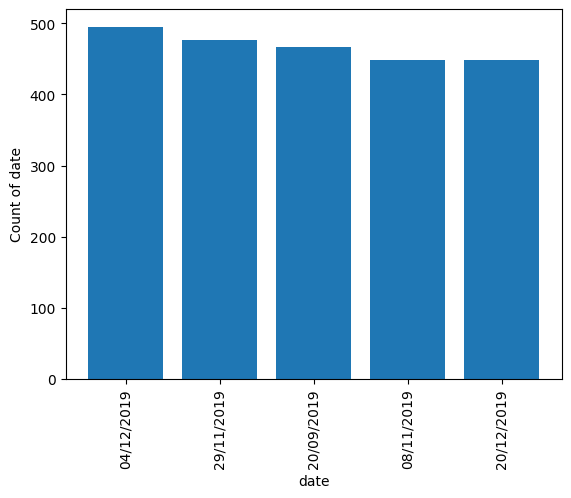

In [240]:
class_series = df['date'].value_counts().head()
class_series
bar_plot = plt.bar(class_series.index, class_series)
plt.locator_params(integer=True)
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Count of date')
plt.show()

# 3 - Cleaning Data

In [241]:
df.accident_reference.value_counts()

010128300    1
420887235    1
420887168    1
420887167    1
420887165    1
            ..
110848214    1
110848212    1
110848210    1
110848207    1
98QC01004    1
Name: accident_reference, Length: 117536, dtype: int64

accident_reference is unqiue for each row, so it doesn't add any new info       
It can be used as index, but we already used accident_index as index    
As a result, it should be dropped

In [242]:
df = df.drop('accident_reference', axis=1)
df.head()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2019010128300,2019,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,3,18/02/2019,...,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01004762
2019010152270,2019,530219.0,172463.0,-0.127949,51.436208,Metropolitan Police,Slight,2,1,15/01/2019,...,unknown (self reported),Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01003117
2019010155191,2019,530222.0,182543.0,-0.124193,51.526795,Metropolitan Police,Slight,2,1,01/01/2019,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000943
2019010155192,2019,525531.0,184605.0,-0.191044,51.546387,Metropolitan Police,Serious,1,1,01/01/2019,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000973
2019010155194,2019,524920.0,184004.0,-0.200064,51.541121,Metropolitan Police,Slight,2,2,01/01/2019,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000546


## Observing Missing and duplicate Data

Get number of missing data in each column

In [243]:
# Calculating sum of null entries and percentage of null entries
sum_null = df.isnull().sum()
perc_null = df.isnull().sum() / len(df)
perc_null_mean = df.isnull().mean()*100

#Sum Of Missing Values
sum_null

accident_year                                      0
location_easting_osgr                             28
location_northing_osgr                            28
longitude                                         28
latitude                                          28
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                                  0
road_type                                       2143
speed_limit                                   

Percentage of missing data in each column

In [244]:
perc_null_mean

accident_year                                   0.000000
location_easting_osgr                           0.023822
location_northing_osgr                          0.023822
longitude                                       0.023822
latitude                                        0.023822
police_force                                    0.000000
accident_severity                               0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
date                                            0.000000
day_of_week                                     0.000000
time                                            0.000000
local_authority_district                        0.000000
local_authority_ons_district                    0.000000
local_authority_highway                         0.000000
first_road_class                                0.000000
first_road_number                               0.000000
road_type                      

location_easting_osgr       
location_northing_osgr           
longitude               
latitude

Missing Completly At Random because the % of missing is only 0.028% 
There is no releation between missing data and others

In [245]:
len(df)

117536

Second_road_number is not missing at random  
If second_road_class is "-1" the second_road_number is missing

road_type   
weather_conditions
 
missing at random as it is only 1.82% of data

Get number of duplicates in dataframe

In [246]:
df.duplicated().sum()

1

There is 1 duplicate

In [247]:
df = df.drop_duplicates()

In [248]:
df.duplicated().sum()

0

Duplicate is now dropped

## Handling Missing data

Drop rows with missing data in as they are MCAR so it won't affect the data  
'location_easting_osgr',    
'location_northing_osgr',   
'longitude',    
'latitude',     
'road_type',    
'weather_conditions'

In [249]:
df_dropped = df.dropna(axis='index', subset=['location_easting_osgr','location_northing_osgr','longitude','latitude','road_type','weather_conditions'])

Calculating sum of null entries and percentage of null entries after dropping these rows

In [250]:
# Calculating sum of null entries and percentage of null entries
sum_null = df_dropped.isnull().sum()
perc_null = df_dropped.isnull().sum() / len(df)
perc_null_mean = df_dropped.isnull().mean()*100
perc_null_mean


accident_year                                   0.000000
location_easting_osgr                           0.000000
location_northing_osgr                          0.000000
longitude                                       0.000000
latitude                                        0.000000
police_force                                    0.000000
accident_severity                               0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
date                                            0.000000
day_of_week                                     0.000000
time                                            0.000000
local_authority_district                        0.000000
local_authority_ons_district                    0.000000
local_authority_highway                         0.000000
first_road_class                                0.000000
first_road_number                               0.000000
road_type                      

Calculate variance of dataframe (after previous dropping rows) to know which arbitary value is suitable for "second_road_number" column       

In [251]:
df_dropped = df_dropped.replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', int(0))
df_dropped.second_road_number = df_dropped.second_road_number.astype(float)
df_dropped = df_dropped.replace(r'',np.NaN)
df_dropped.var()

accident_year             0.000000e+00
location_easting_osgr     9.059535e+09
location_northing_osgr    2.294809e+10
longitude                 1.944993e+00
latitude                  1.861771e+00
number_of_vehicles        5.072081e-01
number_of_casualties      5.812826e-01
second_road_number        1.469751e+06
dtype: float64

Replace missing data second_road_number with arbitary value (-1)      
-1 is best option as it doesn't change variance as 9999 changes

In [252]:
df_dropped = df_dropped.replace(np.NaN, -1)
df_dropped.second_road_number.unique()

array([ 4.202e+03, -1.000e+00,  0.000e+00, ...,  7.940e+02,  7.500e+01,
        6.357e+03])

Calculate original dataframe variance

In [253]:
df.var()

accident_year             0.000000e+00
location_easting_osgr     9.031198e+09
location_northing_osgr    2.278170e+10
longitude                 1.938638e+00
latitude                  1.848313e+00
number_of_vehicles        5.018519e-01
number_of_casualties      5.690732e-01
dtype: float64

Calculating variance of second_road_number after replacement

In [254]:
df_dropped.var()

accident_year             0.000000e+00
location_easting_osgr     9.059535e+09
location_northing_osgr    2.294809e+10
longitude                 1.944993e+00
latitude                  1.861771e+00
number_of_vehicles        5.072081e-01
number_of_casualties      5.812826e-01
second_road_number        8.923065e+05
dtype: float64

Compare between variance different of -1 and 9999

9999 variance change

In [255]:
2.330686e+07 - 1.469751e+06

21837109.0

-1 variance change

In [256]:
8.922991e+05 - 1.469751e+06

-577451.9

## Findings and conclusions

Observing data after handling missing data

In [257]:
df_dropped.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,112455.0,112455.000000,1.124550e+05,112455.000000,112455.000000,112455.000000,112455.000000,112455.000000
mean,2019.0,451834.957476,2.796804e+05,-1.257526,52.404393,1.846045,1.309333,229.021849
std,0.0,95181.589489,1.514863e+05,1.394630,1.364467,0.712185,0.762419,944.619778
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,387814.000000,1.755405e+05,-2.183272,51.466082,1.000000,1.000000,-1.000000
50%,2019.0,458650.000000,2.217080e+05,-1.135156,51.878815,2.000000,1.000000,0.000000
75%,2019.0,529015.500000,3.861700e+05,-0.140140,53.368929,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,17.000000,52.000000,9177.000000


In [258]:
df_dropped.var()

accident_year             0.000000e+00
location_easting_osgr     9.059535e+09
location_northing_osgr    2.294809e+10
longitude                 1.944993e+00
latitude                  1.861771e+00
number_of_vehicles        5.072081e-01
number_of_casualties      5.812826e-01
second_road_number        8.923065e+05
dtype: float64

Dist. of Longitude before and after handling data

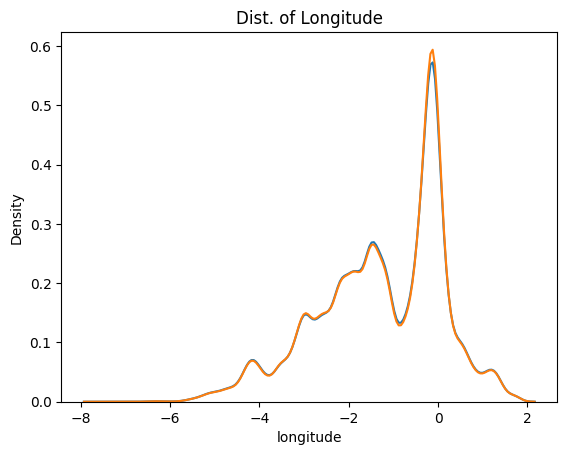

In [259]:
sns.kdeplot(df_dropped.longitude)
sns.kdeplot(df.longitude)
plt.title('Dist. of Longitude')
plt.show()

Dist. of Latitude before and after handling data

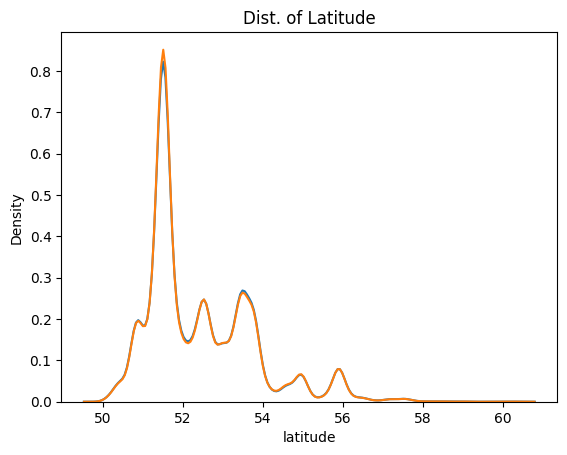

In [260]:
sns.kdeplot(df_dropped.latitude)
sns.kdeplot(df.latitude)
plt.title('Dist. of Latitude')
plt.show()

Dist. of location_easting_osgr before and after handling data

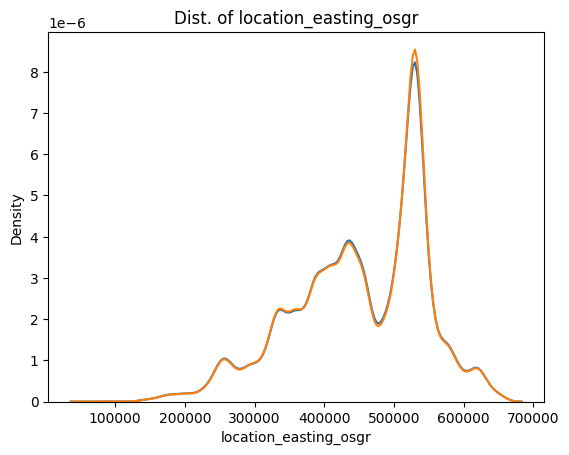

In [261]:
sns.kdeplot(df_dropped.location_easting_osgr)
sns.kdeplot(df.location_easting_osgr)
plt.title('Dist. of location_easting_osgr')
plt.show()

Dist. of location_northing_osgr before and after handling data


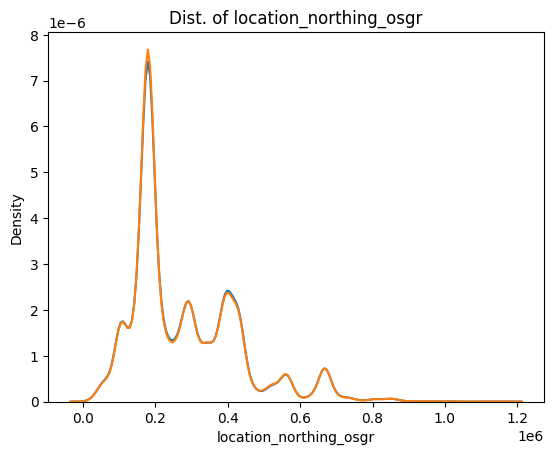

In [262]:
sns.kdeplot(df_dropped.location_northing_osgr)
sns.kdeplot(df.location_northing_osgr)
plt.title('Dist. of location_northing_osgr')
plt.show()

Number of rows before handling data

In [263]:
len(df)


117535

Number of rows after handling data

In [264]:
len(df_dropped)

112455

Distributions aren't affected with dropping small % of data

## Observing outliers

In [265]:
df_dropped.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,112455.0,112455.000000,1.124550e+05,112455.000000,112455.000000,112455.000000,112455.000000,112455.000000
mean,2019.0,451834.957476,2.796804e+05,-1.257526,52.404393,1.846045,1.309333,229.021849
std,0.0,95181.589489,1.514863e+05,1.394630,1.364467,0.712185,0.762419,944.619778
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,387814.000000,1.755405e+05,-2.183272,51.466082,1.000000,1.000000,-1.000000
50%,2019.0,458650.000000,2.217080e+05,-1.135156,51.878815,2.000000,1.000000,0.000000
75%,2019.0,529015.500000,3.861700e+05,-0.140140,53.368929,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,17.000000,52.000000,9177.000000


Function to draw boxplot to observe outliers

In [266]:
def draw_box_plot(df):
    plt.boxplot(df)
    plt.show()
    sns.kdeplot(df)
    plt.show()

Outliers of number_of_vehicles

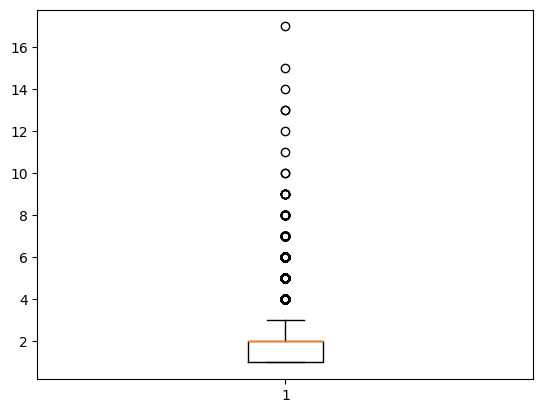

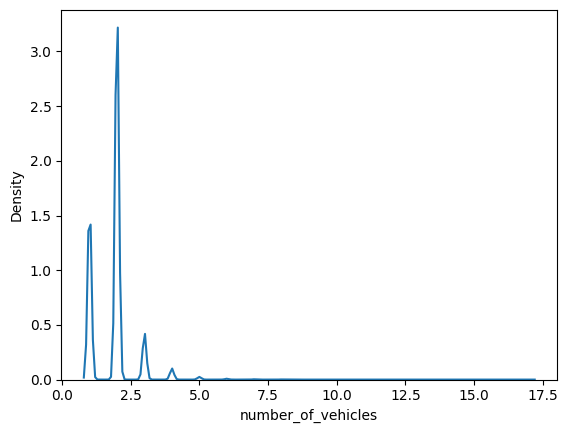

In [267]:
draw_box_plot(df_dropped.number_of_vehicles)

Outliers of number_of_casualties

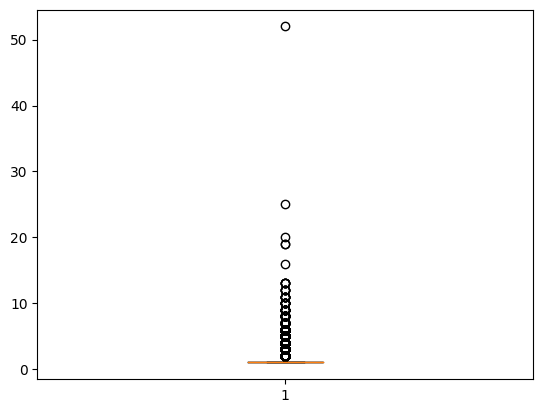

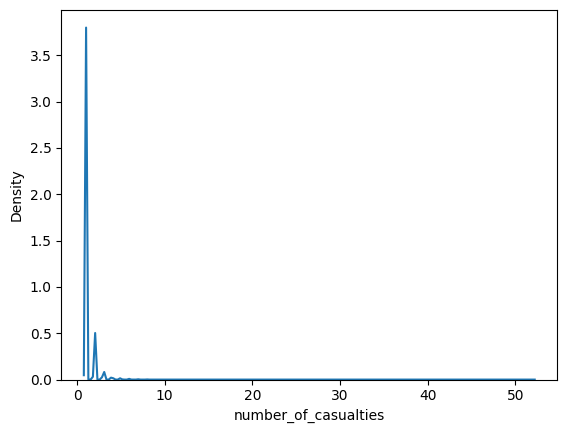

In [268]:
draw_box_plot(df_dropped.number_of_casualties)

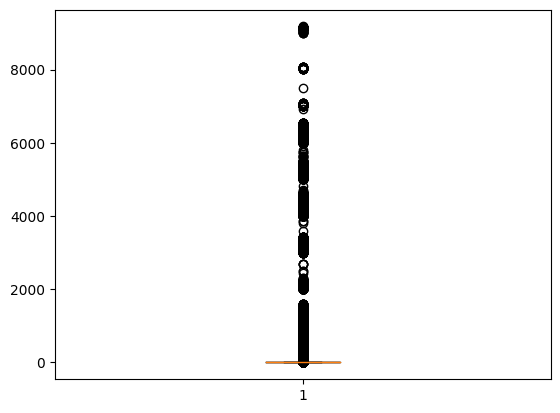

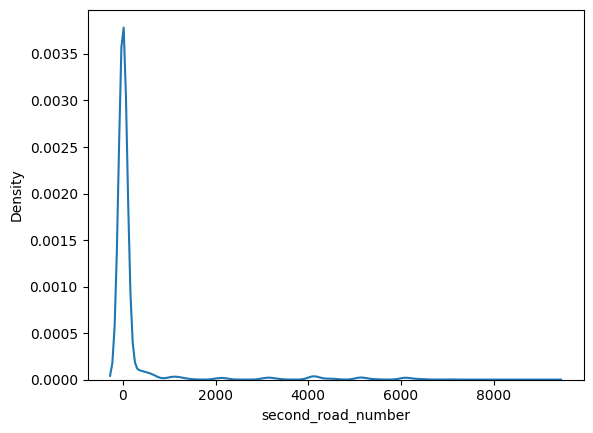

In [269]:
draw_box_plot(df_dropped.second_road_number)

In [270]:
df_dropped.number_of_vehicles.skew(),df_dropped.number_of_casualties.skew(),df_dropped.second_road_number.skew()

(1.7363845914047178, 6.608610077427437, 4.943607682262643)

## Handling outliers

function to handle outliers using z-score

In [271]:
def zscore(df_org,df, n):
    z_number_of_vehicles = np.abs(stats.zscore(df))
    filtered_entries_number_of_vehicles = z_number_of_vehicles < n
    df_zscore_filter = df_org.copy()
    return df_zscore_filter[filtered_entries_number_of_vehicles]

Using z-score to handle outliers

In [272]:
df_zscore_filter = zscore(df_dropped, df_dropped.number_of_vehicles,3)
df_zscore_filter.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,109720.0,109720.000000,1.097200e+05,109720.000000,109720.000000,109720.000000,109720.000000,109720.000000
mean,2019.0,451759.147995,2.797487e+05,-1.258592,52.405015,1.781471,1.293055,231.869559
std,0.0,95172.330662,1.514912e+05,1.394484,1.364511,0.570652,0.735088,950.260297
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,387757.000000,1.755910e+05,-2.183998,51.466632,1.000000,1.000000,-1.000000
50%,2019.0,458605.000000,2.217740e+05,-1.135794,51.879654,2.000000,1.000000,0.000000
75%,2019.0,528998.250000,3.862470e+05,-0.140412,53.369866,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,3.000000,52.000000,9177.000000


In [273]:
df_dropped.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,112455.0,112455.000000,1.124550e+05,112455.000000,112455.000000,112455.000000,112455.000000,112455.000000
mean,2019.0,451834.957476,2.796804e+05,-1.257526,52.404393,1.846045,1.309333,229.021849
std,0.0,95181.589489,1.514863e+05,1.394630,1.364467,0.712185,0.762419,944.619778
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,387814.000000,1.755405e+05,-2.183272,51.466082,1.000000,1.000000,-1.000000
50%,2019.0,458650.000000,2.217080e+05,-1.135156,51.878815,2.000000,1.000000,0.000000
75%,2019.0,529015.500000,3.861700e+05,-0.140140,53.368929,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,17.000000,52.000000,9177.000000


In [274]:
print(df_dropped.shape)
print(df_zscore_filter.shape)

(112455, 34)
(109720, 34)


Outliers of number_of_vehicles are handled

In [275]:
df_zscore_filter = zscore(df_zscore_filter,df_zscore_filter.number_of_casualties,3)
df_zscore_filter.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,107445.0,107445.000000,1.074450e+05,107445.000000,107445.000000,107445.000000,107445.000000,107445.000000
mean,2019.0,451964.870148,2.793862e+05,-1.255602,52.401760,1.774312,1.222011,231.762576
std,0.0,95053.061377,1.513439e+05,1.392683,1.363183,0.568494,0.500346,949.812121
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,388037.000000,1.755460e+05,-2.180044,51.466122,1.000000,1.000000,-1.000000
50%,2019.0,458833.000000,2.211630e+05,-1.131507,51.874128,2.000000,1.000000,0.000000
75%,2019.0,529029.000000,3.859610e+05,-0.139936,53.367254,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,3.000000,3.000000,9177.000000


In [276]:
df_dropped.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,112455.0,112455.000000,1.124550e+05,112455.000000,112455.000000,112455.000000,112455.000000,112455.000000
mean,2019.0,451834.957476,2.796804e+05,-1.257526,52.404393,1.846045,1.309333,229.021849
std,0.0,95181.589489,1.514863e+05,1.394630,1.364467,0.712185,0.762419,944.619778
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,387814.000000,1.755405e+05,-2.183272,51.466082,1.000000,1.000000,-1.000000
50%,2019.0,458650.000000,2.217080e+05,-1.135156,51.878815,2.000000,1.000000,0.000000
75%,2019.0,529015.500000,3.861700e+05,-0.140140,53.368929,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,17.000000,52.000000,9177.000000


In [277]:
print(df_dropped.shape)
print(df_zscore_filter.shape)

(112455, 34)
(107445, 34)


Outliers of number_of_casualties are handled

In [278]:
df_zscore_filter = zscore(df_zscore_filter,df_zscore_filter.second_road_number,2)
df_zscore_filter.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,102981.0,102981.000000,1.029810e+05,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000
mean,2019.0,453440.165079,2.794423e+05,-1.234223,52.402073,1.771647,1.221303,46.401569
std,0.0,95326.469479,1.519598e+05,1.397108,1.368721,0.571326,0.499529,201.054171
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,389512.000000,1.753700e+05,-2.157449,51.464476,1.000000,1.000000,-1.000000
50%,2019.0,461210.000000,2.197500e+05,-1.093983,51.863079,2.000000,1.000000,0.000000
75%,2019.0,529681.000000,3.859470e+05,-0.131637,53.367051,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,3.000000,3.000000,2131.000000


In [279]:
df_dropped.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,112455.0,112455.000000,1.124550e+05,112455.000000,112455.000000,112455.000000,112455.000000,112455.000000
mean,2019.0,451834.957476,2.796804e+05,-1.257526,52.404393,1.846045,1.309333,229.021849
std,0.0,95181.589489,1.514863e+05,1.394630,1.364467,0.712185,0.762419,944.619778
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,387814.000000,1.755405e+05,-2.183272,51.466082,1.000000,1.000000,-1.000000
50%,2019.0,458650.000000,2.217080e+05,-1.135156,51.878815,2.000000,1.000000,0.000000
75%,2019.0,529015.500000,3.861700e+05,-0.140140,53.368929,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,17.000000,52.000000,9177.000000


In [280]:
print(df_dropped.shape)
print(df_zscore_filter.shape)

(112455, 34)
(102981, 34)


Outliers of second_road_number aren't fully handled

## Findings and conclusions

Observe dataframe after outliers are handled

In [281]:
df_zscore_filter.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,102981.0,102981.000000,1.029810e+05,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000
mean,2019.0,453440.165079,2.794423e+05,-1.234223,52.402073,1.771647,1.221303,46.401569
std,0.0,95326.469479,1.519598e+05,1.397108,1.368721,0.571326,0.499529,201.054171
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,389512.000000,1.753700e+05,-2.157449,51.464476,1.000000,1.000000,-1.000000
50%,2019.0,461210.000000,2.197500e+05,-1.093983,51.863079,2.000000,1.000000,0.000000
75%,2019.0,529681.000000,3.859470e+05,-0.131637,53.367051,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,3.000000,3.000000,2131.000000


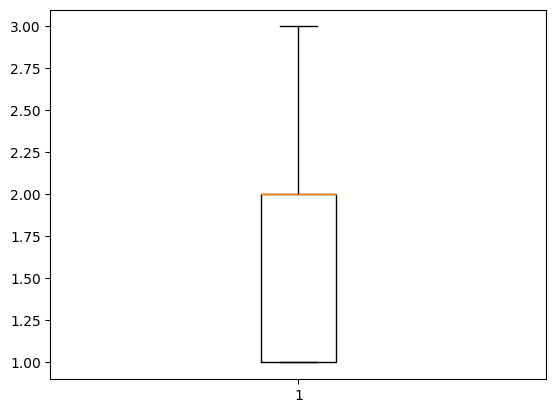

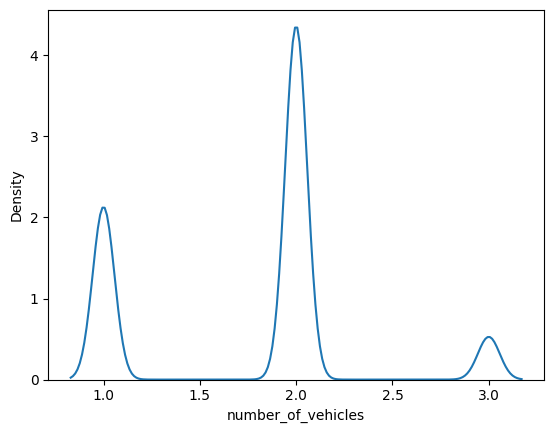

In [282]:
draw_box_plot(df_zscore_filter.number_of_vehicles)

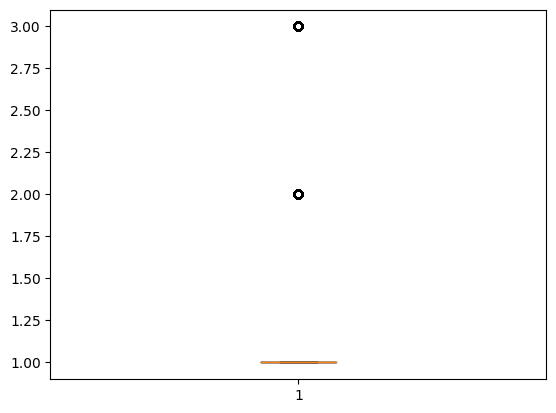

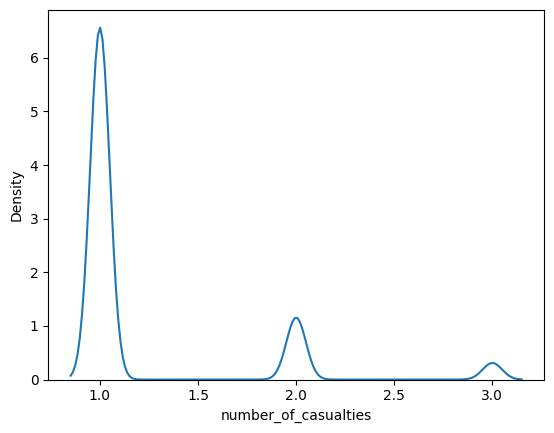

In [283]:
draw_box_plot(df_zscore_filter.number_of_casualties)

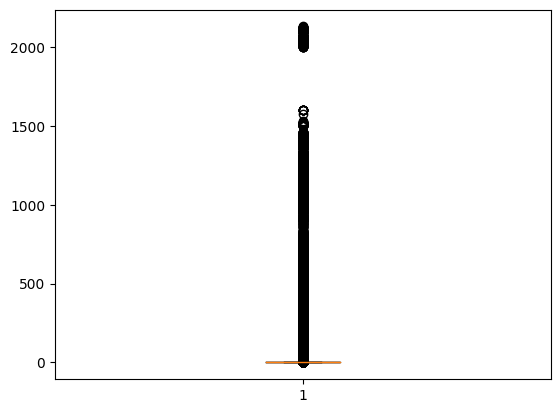

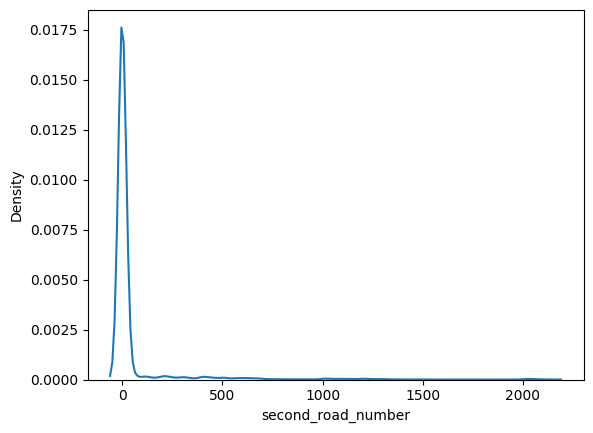

In [284]:
draw_box_plot(df_zscore_filter.second_road_number)

In [285]:
df_dropped.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,112455.0,112455.000000,1.124550e+05,112455.000000,112455.000000,112455.000000,112455.000000,112455.000000
mean,2019.0,451834.957476,2.796804e+05,-1.257526,52.404393,1.846045,1.309333,229.021849
std,0.0,95181.589489,1.514863e+05,1.394630,1.364467,0.712185,0.762419,944.619778
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,387814.000000,1.755405e+05,-2.183272,51.466082,1.000000,1.000000,-1.000000
50%,2019.0,458650.000000,2.217080e+05,-1.135156,51.878815,2.000000,1.000000,0.000000
75%,2019.0,529015.500000,3.861700e+05,-0.140140,53.368929,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,17.000000,52.000000,9177.000000


In [286]:
df_zscore_filter.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,102981.0,102981.000000,1.029810e+05,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000
mean,2019.0,453440.165079,2.794423e+05,-1.234223,52.402073,1.771647,1.221303,46.401569
std,0.0,95326.469479,1.519598e+05,1.397108,1.368721,0.571326,0.499529,201.054171
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,389512.000000,1.753700e+05,-2.157449,51.464476,1.000000,1.000000,-1.000000
50%,2019.0,461210.000000,2.197500e+05,-1.093983,51.863079,2.000000,1.000000,0.000000
75%,2019.0,529681.000000,3.859470e+05,-0.131637,53.367051,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,3.000000,3.000000,2131.000000


Outliers are handled except for second_road_number which still contains outliers

# 4 - Data transformation

## 4.1 - Discretization

In [287]:
df_zscore_filter.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,second_road_number
count,102981.0,102981.000000,1.029810e+05,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000
mean,2019.0,453440.165079,2.794423e+05,-1.234223,52.402073,1.771647,1.221303,46.401569
std,0.0,95326.469479,1.519598e+05,1.397108,1.368721,0.571326,0.499529,201.054171
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,-1.000000
25%,2019.0,389512.000000,1.753700e+05,-2.157449,51.464476,1.000000,1.000000,-1.000000
50%,2019.0,461210.000000,2.197500e+05,-1.093983,51.863079,2.000000,1.000000,0.000000
75%,2019.0,529681.000000,3.859470e+05,-0.131637,53.367051,2.000000,1.000000,0.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,3.000000,3.000000,2131.000000


Qcut method to discretize

In [288]:
def discrete(string,n):
    number_of_vehicles_disccretised, intervals = pd.qcut(
    df_zscore_filter[string], n, labels=None, retbins=True, precision=3, duplicates='drop')
    df_disccretised = pd.concat([number_of_vehicles_disccretised, df_zscore_filter[string]], axis=1)
    df_disccretised.columns = [f'{string}_disc',string]
    return df_disccretised

Convert date to datetime format

In [289]:
df_zscore_filter.date = pd.to_datetime(df_zscore_filter.date)
df_zscore_filter.date

accident_index
2019010152270   2019-01-15
2019010155191   2019-01-01
2019010155192   2019-01-01
2019010155194   2019-01-01
2019010155195   2019-01-01
                   ...    
2019984106819   2019-05-30
2019984106919   2019-05-18
2019984107219   2019-06-21
2019984107419   2019-06-29
201998QC01004   2019-04-21
Name: date, Length: 102981, dtype: datetime64[ns]

In [290]:
df_disccretised = discrete('date',52)
df_disccretised

,date_disc,date
accident_index,,
2019010152270,"(2019-01-08, 2019-01-15]",2019-01-15
2019010155191,"(2018-12-31 23:59:59.999999999, 2019-01-08]",2019-01-01
2019010155192,"(2018-12-31 23:59:59.999999999, 2019-01-08]",2019-01-01
2019010155194,"(2018-12-31 23:59:59.999999999, 2019-01-08]",2019-01-01
2019010155195,"(2018-12-31 23:59:59.999999999, 2019-01-08]",2019-01-01
...,...,...
2019984106819,"(2019-05-23, 2019-05-31]",2019-05-30
2019984106919,"(2019-05-16, 2019-05-23]",2019-05-18
2019984107219,"(2019-06-14, 2019-06-21]",2019-06-21


Saving disccritised week number in a new column

In [291]:
df_zscore_filter["Week_number"] = df_disccretised.date_disc
df_zscore_filter

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week_number
accident_index,,,,,,,,,,,,,,,,,,,,,
2019010152270,2019,530219.0,172463.0,-0.127949,51.436208,Metropolitan Police,Slight,2,1,2019-01-15,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01003117,"(2019-01-08, 2019-01-15]"
2019010155191,2019,530222.0,182543.0,-0.124193,51.526795,Metropolitan Police,Slight,2,1,2019-01-01,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000943,"(2018-12-31 23:59:59.999999999, 2019-01-08]"
2019010155192,2019,525531.0,184605.0,-0.191044,51.546387,Metropolitan Police,Serious,1,1,2019-01-01,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000973,"(2018-12-31 23:59:59.999999999, 2019-01-08]"
2019010155194,2019,524920.0,184004.0,-0.200064,51.541121,Metropolitan Police,Slight,2,2,2019-01-01,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000546,"(2018-12-31 23:59:59.999999999, 2019-01-08]"
2019010155195,2019,540188.0,185266.0,0.020461,51.548879,Metropolitan Police,Slight,2,3,2019-01-01,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003544,"(2018-12-31 23:59:59.999999999, 2019-01-08]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019984106819,2019,303932.0,610445.0,-3.517671,55.378549,Dumfries and Galloway,Slight,3,2,2019-05-30,...,Daylight,Raining no high winds,Wet or damp,None,None,Rural,Yes,Data missing or out of range,-1,"(2019-05-23, 2019-05-31]"
2019984106919,2019,312635.0,573392.0,-3.368899,55.047323,Dumfries and Galloway,Slight,1,1,2019-05-18,...,Daylight,Fine no high winds,Wet or damp,None,None,Rural,Yes,Data missing or out of range,-1,"(2019-05-16, 2019-05-23]"
2019984107219,2019,318544.0,567087.0,-3.274645,54.991685,Dumfries and Galloway,Slight,2,1,2019-06-21,...,Daylight,Fine no high winds,Dry,None,None,Rural,No,Data missing or out of range,-1,"(2019-06-14, 2019-06-21]"


## 4.11 - Findings and conclusions

The dates are disccritised in to range of weeks which can be used later to get number of week

## 4.2 - Encoding

In [292]:
df_zscore_filter

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week_number
accident_index,,,,,,,,,,,,,,,,,,,,,
2019010152270,2019,530219.0,172463.0,-0.127949,51.436208,Metropolitan Police,Slight,2,1,2019-01-15,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01003117,"(2019-01-08, 2019-01-15]"
2019010155191,2019,530222.0,182543.0,-0.124193,51.526795,Metropolitan Police,Slight,2,1,2019-01-01,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000943,"(2018-12-31 23:59:59.999999999, 2019-01-08]"
2019010155192,2019,525531.0,184605.0,-0.191044,51.546387,Metropolitan Police,Serious,1,1,2019-01-01,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000973,"(2018-12-31 23:59:59.999999999, 2019-01-08]"
2019010155194,2019,524920.0,184004.0,-0.200064,51.541121,Metropolitan Police,Slight,2,2,2019-01-01,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000546,"(2018-12-31 23:59:59.999999999, 2019-01-08]"
2019010155195,2019,540188.0,185266.0,0.020461,51.548879,Metropolitan Police,Slight,2,3,2019-01-01,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003544,"(2018-12-31 23:59:59.999999999, 2019-01-08]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019984106819,2019,303932.0,610445.0,-3.517671,55.378549,Dumfries and Galloway,Slight,3,2,2019-05-30,...,Daylight,Raining no high winds,Wet or damp,None,None,Rural,Yes,Data missing or out of range,-1,"(2019-05-23, 2019-05-31]"
2019984106919,2019,312635.0,573392.0,-3.368899,55.047323,Dumfries and Galloway,Slight,1,1,2019-05-18,...,Daylight,Fine no high winds,Wet or damp,None,None,Rural,Yes,Data missing or out of range,-1,"(2019-05-16, 2019-05-23]"
2019984107219,2019,318544.0,567087.0,-3.274645,54.991685,Dumfries and Galloway,Slight,2,1,2019-06-21,...,Daylight,Fine no high winds,Dry,None,None,Rural,No,Data missing or out of range,-1,"(2019-06-14, 2019-06-21]"


Use label encoding to encode categorical attributes   
Encode categorical data as numbers without expanding dataframe size which is faster to process.

Function to encode categorical attributes in a given dataset as numbers

In [293]:
def number_encode_features(df):
    result = df.copy() # take a copy of the dataframe
    result['Week_number'] = preprocessing.LabelEncoder().fit_transform(result['Week_number'])
#     return result
    for column in result.columns:
        if result.dtypes[column] == object: # if attribute is categorical
            # Apply LabelEncoder method to attribute
            # fit will infer the number of numerical values needed by counting the number of categories
            # then transform will replace each category with its numerical counterpart
            if column != 'accident_reference':
                result[column] = preprocessing.LabelEncoder().fit_transform(result[column].astype(str))
    return result

In [294]:
# Apply function defined above to income dataset
encoded_data = number_encode_features(df_zscore_filter)

# Display last 5 records in transformed dataset to verify numerical transformation
encoded_data

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week_number
accident_index,,,,,,,,,,,,,,,,,,,,,
2019010152270,2019,530219.0,172463.0,-0.127949,51.436208,29,2,2,1,2019-01-15,...,1,1,1,4,2,1,1,1,2626,1
2019010155191,2019,530222.0,182543.0,-0.124193,51.526795,29,2,2,1,2019-01-01,...,1,1,1,4,2,1,2,1,795,0
2019010155192,2019,525531.0,184605.0,-0.191044,51.546387,29,1,1,1,2019-01-01,...,1,1,1,4,2,1,2,1,824,0
2019010155194,2019,524920.0,184004.0,-0.200064,51.541121,29,2,2,2,2019-01-01,...,1,1,1,4,2,1,2,1,463,0
2019010155195,2019,540188.0,185266.0,0.020461,51.548879,29,2,2,3,2019-01-01,...,1,1,1,4,2,1,2,1,2991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019984106819,2019,303932.0,610445.0,-3.517671,55.378549,11,2,3,2,2019-05-30,...,5,5,5,4,2,0,2,0,0,20
2019984106919,2019,312635.0,573392.0,-3.368899,55.047323,11,2,1,1,2019-05-18,...,5,1,5,4,2,0,2,0,0,19
2019984107219,2019,318544.0,567087.0,-3.274645,54.991685,11,2,2,1,2019-06-21,...,5,1,1,4,2,0,0,0,0,23


Keys for encoded and arbitrary data

In [295]:
df_key = pd.DataFrame({})
i= range(len(df_zscore_filter.columns))
for column in df_zscore_filter.columns:
        if df_zscore_filter.dtypes[column] == object:
            if column != 'accident_reference':
                df_key[column] = pd.Series(df_zscore_filter[column].unique().tolist())
                df_key[f'{column}_key'] = pd.Series(encoded_data[column].unique().tolist())
                
df_key['Week_number'] = pd.Series(df_zscore_filter['Week_number'].unique().tolist())
df_key['Week_number_key'] = pd.Series(encoded_data['Week_number'].unique().tolist())

df_key['second_road_number'] = pd.Series(df_zscore_filter.second_road_number.unique().tolist())
df_key['second_road_number_key'] = pd.Series(encoded_data.second_road_number.unique().tolist())

for i in range(len(df_key['second_road_number'])):
    if df_key['second_road_number'][i] == -1:
        df_key['second_road_number_key'][i] = "Arbitrary value"
    elif df_key['second_road_number'][i] == 0:
        df_key['second_road_number_key'][i] = 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero '
    else:
        df_key['second_road_number'][i] = ""
        df_key['second_road_number_key'][i] = ""
df_key = df_key.replace(np.nan, '', regex=True)
df_key

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,police_force,police_force_key,accident_severity,accident_severity_key,day_of_week,day_of_week_key,time,time_key,local_authority_district,local_authority_district_key,...,did_police_officer_attend_scene_of_accident,did_police_officer_attend_scene_of_accident_key,trunk_road_flag,trunk_road_flag_key,lsoa_of_accident_location,lsoa_of_accident_location_key,Week_number,Week_number_key,second_road_number,second_road_number_key
0,Metropolitan Police,29,Slight,2.0,Tuesday,5.0,21:45,1304,Lambeth,173,...,No - accident was reported using a self comple...,1.0,Non-trunk,1.0,E01003117,2626,"(2019-01-08, 2019-01-15]",1,-1.0,Arbitrary value
1,Cumbria,7,Serious,1.0,Wednesday,6.0,01:50,110,Camden,50,...,Yes,2.0,Trunk (Roads managed by Highways England),2.0,E01000943,795,"(2018-12-31 23:59:59.999999999, 2019-01-08]",0,0.0,first_road_class is C or Unclassified. These r...
2,Lancashire,24,Fatal,0.0,Thursday,4.0,01:20,80,Brent,35,...,No,0.0,Data missing or out of range,0.0,E01000973,824,"(2019-01-29, 2019-02-05]",4,,
3,Merseyside,28,,,Friday,0.0,00:40,40,Newham,208,...,,,,,E01000546,463,"(2019-02-26, 2019-03-06]",8,,
4,Greater Manchester,18,,,Saturday,2.0,02:45,165,Croydon,82,...,,,,,E01003544,2991,"(2019-03-27, 2019-04-04]",12,,
5,Cheshire,4,,,Sunday,3.0,01:35,95,Barking and Dagenham,12,...,,,,,E01001043,883,"(2019-04-25, 2019-05-03]",16,,
6,Northumbria,35,,,Monday,1.0,01:15,75,Merton,193,...,,,,,E01000031,25,"(2019-05-31, 2019-06-08]",21,,
7,Durham,12,,,,,04:30,269,Redbridge,244,...,,,,,E01003469,2932,"(2019-06-28, 2019-07-05]",25,,
8,North Yorkshire,32,,,,,03:00,180,Tower Hamlets,335,...,,,,,E01003689,3103,"(2019-07-25, 2019-08-02]",29,,
9,West Yorkshire,49,,,,,04:10,250,Islington,165,...,,,,,E01032764,24778,"(2019-08-30, 2019-09-07]",34,,


## 4.22 - Findings and conlcusions

Data is encoded but there is a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them. It gives weight to each column.

In [296]:
encoded_data.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week_number
count,102981.0,102981.000000,1.029810e+05,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000,...,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000,102981.000000
mean,2019.0,453440.165079,2.794423e+05,-1.234223,52.402073,28.047077,1.775318,1.771647,1.221303,3.011255,...,3.951739,1.641060,2.154728,4.074091,2.040842,0.676387,1.486614,0.977054,12409.117022,25.419980
std,0.0,95326.469479,1.519598e+05,1.397108,1.368721,13.195558,0.448507,0.571326,0.499529,2.069669,...,1.718588,1.446757,1.801848,0.628688,0.435912,0.467857,0.831040,0.387697,8378.705400,14.993739
min,2019.0,64084.000000,1.081400e+04,-7.525273,49.917760,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,389512.000000,1.753700e+05,-2.157449,51.464476,20.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,0.000000,1.000000,1.000000,4071.000000,12.000000
50%,2019.0,461210.000000,2.197500e+05,-1.093983,51.863079,29.000000,2.000000,2.000000,1.000000,3.000000,...,5.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,1.000000,12448.000000,25.000000
75%,2019.0,529681.000000,3.859470e+05,-0.131637,53.367051,39.000000,2.000000,2.000000,1.000000,5.000000,...,5.000000,1.000000,5.000000,4.000000,2.000000,1.000000,2.000000,1.000000,19803.000000,38.000000
max,2019.0,655244.000000,1.167366e+06,1.757476,60.388637,50.000000,2.000000,3.000000,3.000000,6.000000,...,5.000000,7.000000,6.000000,9.000000,7.000000,1.000000,2.000000,2.000000,26912.000000,51.000000


In [297]:
encoded_data.var()

accident_year                                  0.000000e+00
location_easting_osgr                          9.087136e+09
location_northing_osgr                         2.309178e+10
longitude                                      1.951911e+00
latitude                                       1.873396e+00
police_force                                   1.741228e+02
accident_severity                              2.011585e-01
number_of_vehicles                             3.264134e-01
number_of_casualties                           2.495291e-01
day_of_week                                    4.283530e+00
time                                           9.692239e+04
local_authority_district                       1.190847e+04
local_authority_ons_district                   1.206403e+04
local_authority_highway                        3.350660e+03
first_road_class                               5.014784e+00
first_road_number                              7.966681e+05
road_type                               

## 4.3 - Normalisation 

In [298]:
def normalize(df):
    # Get the index of all positive pledges (Box-Cox only takes postive values)
    index_of_positive_pledges = df > 0

    # get only positive pledges (using their indexes)
    positive_pledges = df.loc[index_of_positive_pledges]

    # normalize the pledges (w/ Box-Cox)
    normalized_pledges = stats.boxcox(positive_pledges)[0]
    # plot both together to compare
    fig, ax=plt.subplots(1,2)
    sns.distplot(positive_pledges, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(normalized_pledges, ax=ax[1])
    ax[1].set_title("Normalized data")

Longitude is skewed. Therefore, we need to normalize it.


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



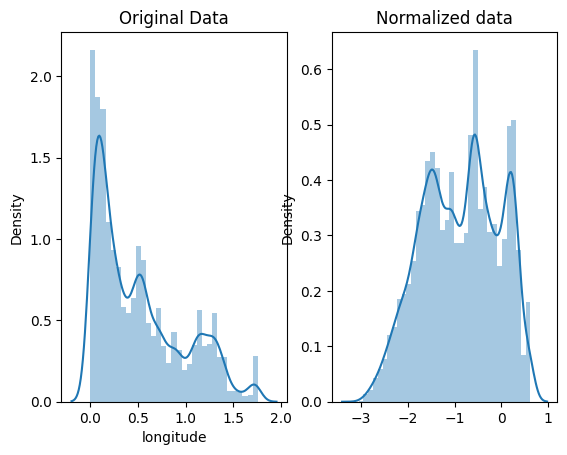

In [299]:
normalize(encoded_data.longitude)

Latitude is skewed. Therefore, we need to normalize it.


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



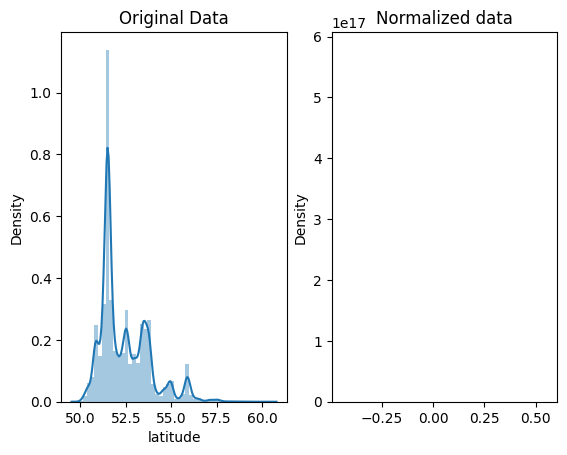

In [300]:
normalize(encoded_data.latitude)

second_road_number is skewed. Therefore, we need to normalize it.


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



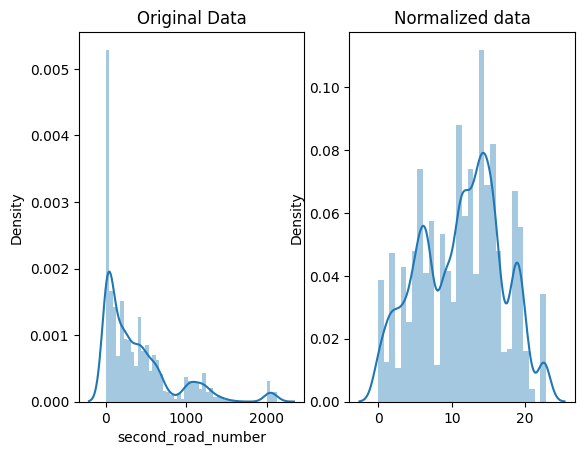

In [301]:
normalize(encoded_data.second_road_number)

## 4.31 - Findings and conclusions

Graphs became more normally dist. after normalization.

## 4.4 - Adding more columns

In [302]:
encoded_data["Is_weekend"] = encoded_data.date.dt.dayofweek > 4
encoded_data["Is_weekend"]

accident_index
2019010152270    False
2019010155191    False
2019010155192    False
2019010155194    False
2019010155195    False
                 ...  
2019984106819    False
2019984106919     True
2019984107219    False
2019984107419     True
201998QC01004     True
Name: Is_weekend, Length: 102981, dtype: bool

In [303]:
encoded_data["Is_friday"] = encoded_data.date.dt.dayofweek == 4
encoded_data["Is_friday"]

accident_index
2019010152270    False
2019010155191    False
2019010155192    False
2019010155194    False
2019010155195    False
                 ...  
2019984106819    False
2019984106919    False
2019984107219     True
2019984107419    False
201998QC01004    False
Name: Is_friday, Length: 102981, dtype: bool

In [304]:
encoded_data["Is_junction_control_automated"] = encoded_data.junction_control == 'Auto traffic signal'
encoded_data["Is_junction_control_automated"]

accident_index
2019010152270    False
2019010155191    False
2019010155192    False
2019010155194    False
2019010155195    False
                 ...  
2019984106819    False
2019984106919    False
2019984107219    False
2019984107419    False
201998QC01004    False
Name: Is_junction_control_automated, Length: 102981, dtype: bool

## 4.41 - Findings and concluisons

More data is observed which helps in analyzing it

## 4.5 - Csv file for lookup

In [206]:
# df_key.to_csv('E://University/Semester 9/Data Engineering (NETW 908)/Project/Accidents_UK_2019_df_encode_key.csv',index=False)

## 5- Exporting the dataframe to a csv file or parquet

Parquet file doesn't work on dataframes containing strings, so it willn't work on df_key

In [207]:
# encoded_data.to_parquet('E://University/Semester 9/Data Engineering (NETW 908)/Project/Accidents_UK_2019_cleaned_and_encoded.parquet', engine='fastparquet')

In [208]:
# encoded_data.to_csv('E://University/Semester 9/Data Engineering (NETW 908)/Project/Accidents_UK_2019_cleaned_and_encoded.csv',index=True)

In [209]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

def getWeather(day, month, long, lat):
    start = datetime(2019, month, day)
    end = datetime(2019, month, day)    

    vancouver = Point(lat, long, 70)
    data = Daily(vancouver, start, end)
    data = data.fetch()
    return data

In [380]:
encoded_data.head()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week_number,Is_weekend,Is_friday,Is_junction_control_automated
accident_index,,,,,,,,,,,,,,,,,,,,,
2019010152270,2019,530219.0,172463.0,-0.127949,51.436208,29,2,2,1,2019-01-15,...,4,2,1,1,1,2626,1,False,False,False
2019010155191,2019,530222.0,182543.0,-0.124193,51.526795,29,2,2,1,2019-01-01,...,4,2,1,2,1,795,0,False,False,False
2019010155192,2019,525531.0,184605.0,-0.191044,51.546387,29,1,1,1,2019-01-01,...,4,2,1,2,1,824,0,False,False,False
2019010155194,2019,524920.0,184004.0,-0.200064,51.541121,29,2,2,2,2019-01-01,...,4,2,1,2,1,463,0,False,False,False
2019010155195,2019,540188.0,185266.0,0.020461,51.548879,29,2,2,3,2019-01-01,...,4,2,1,2,1,2991,0,False,False,False


In [417]:
# result = pd.concat([df1, df4], ignore_index=True, sort=False)
details = pd.DataFrame()
details_df = pd.DataFrame()
details_df['longitude'] = encoded_data.longitude
details_df['latitude'] = encoded_data.latitude
details_df['date'] = encoded_data.date

details_df['tavg'] = ''
details_df['tmin'] = ''
details_df['tmax'] = ''
details_df['wdir'] = ''
details_df['wspd'] = ''
for i in range(len(encoded_data)):
    details = getWeather(encoded_data.date[i].day,encoded_data.date[i].month,encoded_data.longitude[i],encoded_data.latitude[i])
    if(len(details['tavg']) >= 1):
        details_df.tavg[i] = details['tavg'][0]
    if(len(details['tmin']) >= 1):
        details_df.tmin[i] = details['tmin'][0]
    if(len(details['tmax']) >= 1):
        details_df.tmax[i] = details['tmax'][0]
    if(len(details['wdir']) >= 1):
        details_df.wdir[i] = details['wdir'][0]
    if(len(details['wspd']) >= 1):
        details_df.wspd[i] = details['wspd'][0]

details_df

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,longitude,latitude,date,tavg,tmin,tmax,wdir,wspd
accident_index,,,,,,,,
2019010152270,-0.127949,51.436208,2019-01-15,,,,,
2019010155191,-0.124193,51.526795,2019-01-01,[7.9],[4.7],[10.1],[323.0],[13.5]
2019010155192,-0.191044,51.546387,2019-01-01,[7.9],[4.7],[10.1],[323.0],[13.5]
2019010155194,-0.200064,51.541121,2019-01-01,[7.9],[4.7],[10.1],[323.0],[13.5]
2019010155195,0.020461,51.548879,2019-01-01,[7.9],[4.7],[10.1],[323.0],[13.5]
...,...,...,...,...,...,...,...,...
2019984106819,-3.517671,55.378549,2019-05-30,,,,,
2019984106919,-3.368899,55.047323,2019-05-18,,,,,
2019984107219,-3.274645,54.991685,2019-06-21,,,,,


In [ ]:
detail_copy = details_df.copy()
data_copy = encoded_data.copy()
len(detail_copy)

102981

In [ ]:
len(data_copy)

102981

In [ ]:
detail_copy = details_df.copy()
data_copy = encoded_data.copy()
data_copy['temp_avg'] = ''
data_copy['temp_min'] = ''
data_copy['temp_max'] = ''
data_copy['wind_dir'] = ''
data_copy['wind_speed'] = ''

# for i in range(len(detail_copy)):
for i in range(len(detail_copy)):
    data_copy['temp_avg'].iloc[i] = detail_copy['tavg'].iloc[i]
    data_copy['temp_min'].iloc[i] = detail_copy['tmin'].iloc[i]
    data_copy['temp_max'].iloc[i] = detail_copy['tmax'].iloc[i]
    data_copy['wind_dir'].iloc[i] = detail_copy['wdir'].iloc[i]
    data_copy['wind_speed'].iloc[i] = detail_copy['wspd'].iloc[i]

data_copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,lsoa_of_accident_location,Week_number,Is_weekend,Is_friday,Is_junction_control_automated,temp_avg,temp_min,temp_max,wind_dir,wind_speed
accident_index,,,,,,,,,,,,,,,,,,,,,
2019010152270,2019,530219.0,172463.0,-0.127949,51.436208,29,2,2,1,2019-01-15,...,2626,1,False,False,False,6.1,2.9,8.4,231.0,15.5
2019010155191,2019,530222.0,182543.0,-0.124193,51.526795,29,2,2,1,2019-01-01,...,795,0,False,False,False,7.9,4.7,10.1,323.0,13.5
2019010155192,2019,525531.0,184605.0,-0.191044,51.546387,29,1,1,1,2019-01-01,...,824,0,False,False,False,7.9,4.7,10.1,323.0,13.5
2019010155194,2019,524920.0,184004.0,-0.200064,51.541121,29,2,2,2,2019-01-01,...,463,0,False,False,False,7.9,4.7,10.1,323.0,13.5
2019010155195,2019,540188.0,185266.0,0.020461,51.548879,29,2,2,3,2019-01-01,...,2991,0,False,False,False,7.9,4.7,10.1,323.0,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019984106819,2019,303932.0,610445.0,-3.517671,55.378549,11,2,3,2,2019-05-30,...,0,20,False,False,False,,,,,
2019984106919,2019,312635.0,573392.0,-3.368899,55.047323,11,2,1,1,2019-05-18,...,0,19,True,False,False,,,,,
2019984107219,2019,318544.0,567087.0,-3.274645,54.991685,11,2,2,1,2019-06-21,...,0,23,False,True,False,,,,,
